# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
# colab 그래프 한글화 코드
# jupyter 사용시 코드 주석처리 할 것.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

warnings.simplefilter(action='ignore', category=UserWarning)

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

# colab - drive 연동
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# # jupyter notebook 그래프 한글화 코드
# # 시각화 한글폰트 설정
# # jupyter notebook 사용시 주석 해제
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding",
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as spst

In [4]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [5]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
path = '/content/drive/MyDrive/kt_aivle/5_mini_proj_1/data_1/'
df_seoul_bus_station = pd.read_csv(path + 'seoul_bus_station_total.csv', sep=",", encoding = "UTF-8")
df_seoul_moving = pd.read_csv(path + 'not_night_only_seoul_moving.csv', sep=",", encoding = "UTF-8")
df_seoul_business = pd.read_csv(path + 'seoul_business_df.csv', sep=",", encoding = "UTF-8")
df_seoul_people = pd.read_csv(path + 'seoul_people_df.csv', sep=",", encoding = "UTF-8")

In [7]:
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71890,78563,150453
1,중구,63495,68298,131793
2,용산구,109826,117280,227106
3,성동구,137620,147146,284766
4,광진구,167562,183618,351180


In [8]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [9]:
# 전체 컬럼 한 눈에 보기
pd.set_option('display.max_columns', None)

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [11]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [12]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,종로구,71890,78563,150453,5912,3613,1413,382,1982,356,105,4500874,4348356,123.298104,119.119987,59.819645,44.694476,26504649,19803049.50
1,11020,중구,63495,68298,131793,6414,3542,982,175,2121,173,102,3138112,3050645,113.699710,110.530616,58.197800,47.183639,26065980,21132891.17
2,11030,용산구,109826,117280,227106,2987,2076,1332,573,1184,326,69,3495720,3422432,119.962938,117.447907,57.995736,36.418986,23776976,14930983.13
3,11040,성동구,137620,147146,284766,2785,1859,621,1494,1545,432,58,2371151,2331836,90.495039,88.994581,58.184820,41.879404,24144722,17378528.65
4,11050,광진구,167562,183618,351180,2861,1887,1577,1646,1678,274,43,2365355,2382437,107.491706,108.267985,60.890991,45.669953,23556776,17668243.56


---

## 1.가설 수립
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

### **가설 1** :  이동인구가 많을 수록 더 많은 노선이 필요할 것이다.

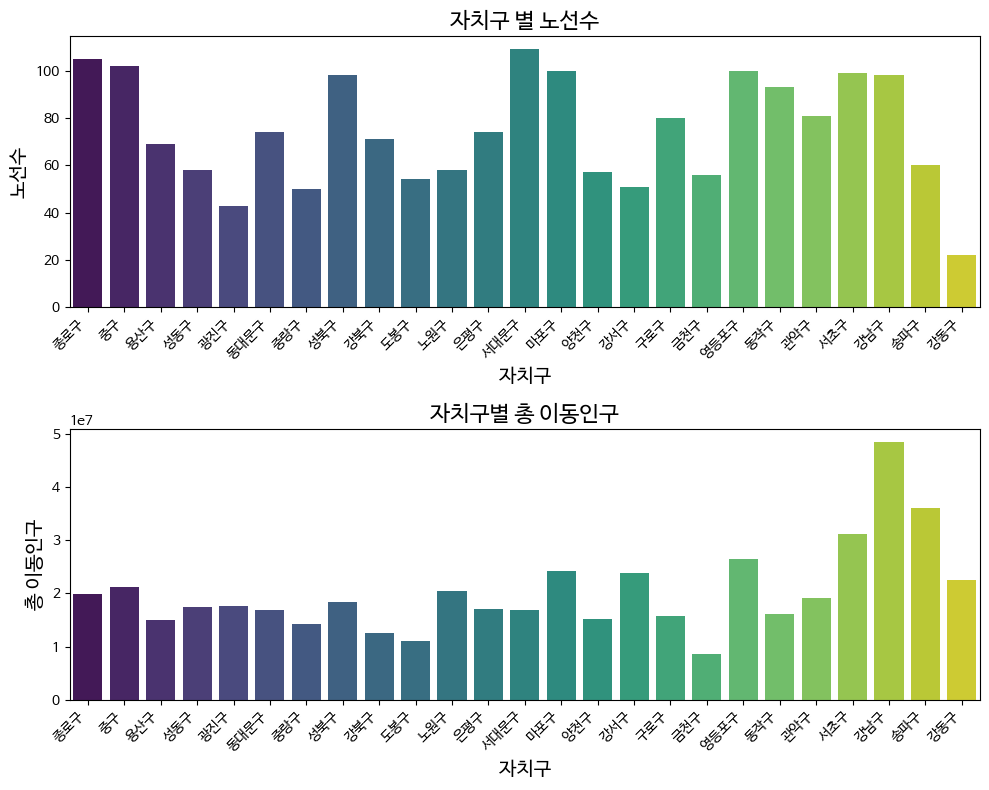

In [13]:
# 이동인구와 노선수의 상관 관게
plt.figure(figsize=(10, 8))

# 자치구별 노선 수
plt.subplot(2, 1, 1)
sns.barplot(data = df, x='자치구', y='노선수', palette="viridis", hue = '자치구', legend = False)
plt.title('자치구 별 노선수', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('노선수', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')


# 자치구별 총 이동인구
plt.subplot(2, 1, 2)
sns.barplot(data = df, x = '자치구', y='총 이동인구', palette="viridis", hue = '자치구', legend = False)
plt.title('자치구별 총 이동인구', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('총 이동인구', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

In [14]:
"""
PearsonRResult(statistic=0.2842787773745359, pvalue=0.1684396143339288)
"""
# 상관계수 0.28
# p-value < 0.05 보다 크므로, 관계가 없다
spst.pearsonr(df['노선수'], df['총 이동인구'])

PearsonRResult(statistic=0.2842787773745359, pvalue=0.1684396143339288)

### **가설 2** : 평균 이동 시간이 긴 자치구와 인접하게 있으면, 버스 이용이 많아 노선이 필요할 것이다.


---


> * **평균 이동 시간**과 **인근 자치구**의 **승하차 승객 수**는 상관 관계가 있을 것이다.
* 평균 이동시간이 긴 자치구는 승하차보다는 **경유지**로서 의미가 있다는 가정 하에, 평균 이동시간이 긴 자치구의 인근에 정류장 수요가 높을 것이다.

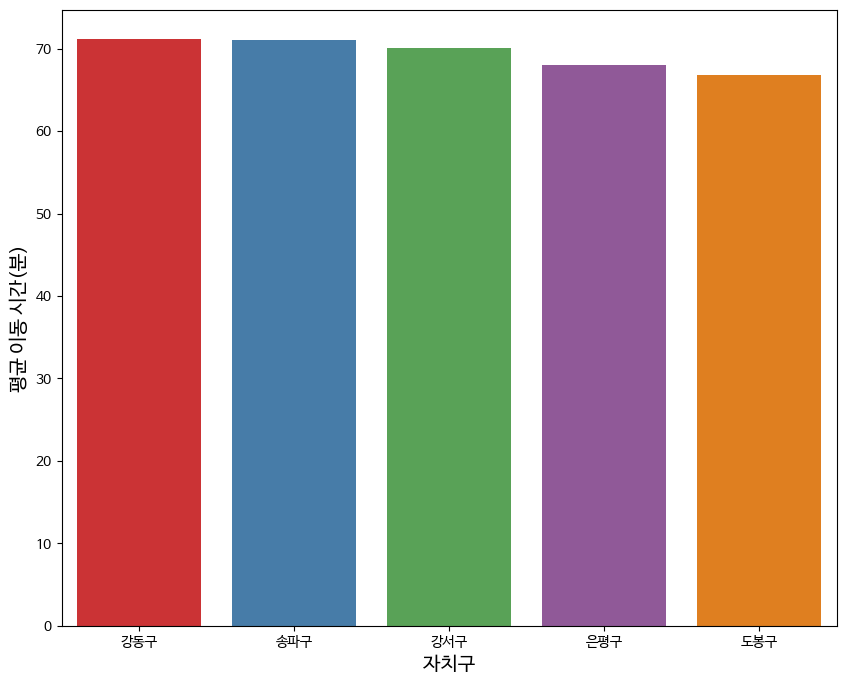

In [15]:
# 평균 이동시간이 가장 긴 5개의 자치구

plt.figure(figsize=(10, 8))
sns.barplot(x='자치구', y='평균 이동 시간(분)', data = df.sort_values('평균 이동 시간(분)', ascending = False).iloc[:5], palette = 'Set1', hue = '자치구', legend = False)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('평균 이동 시간(분)', fontsize=14)
plt.show()


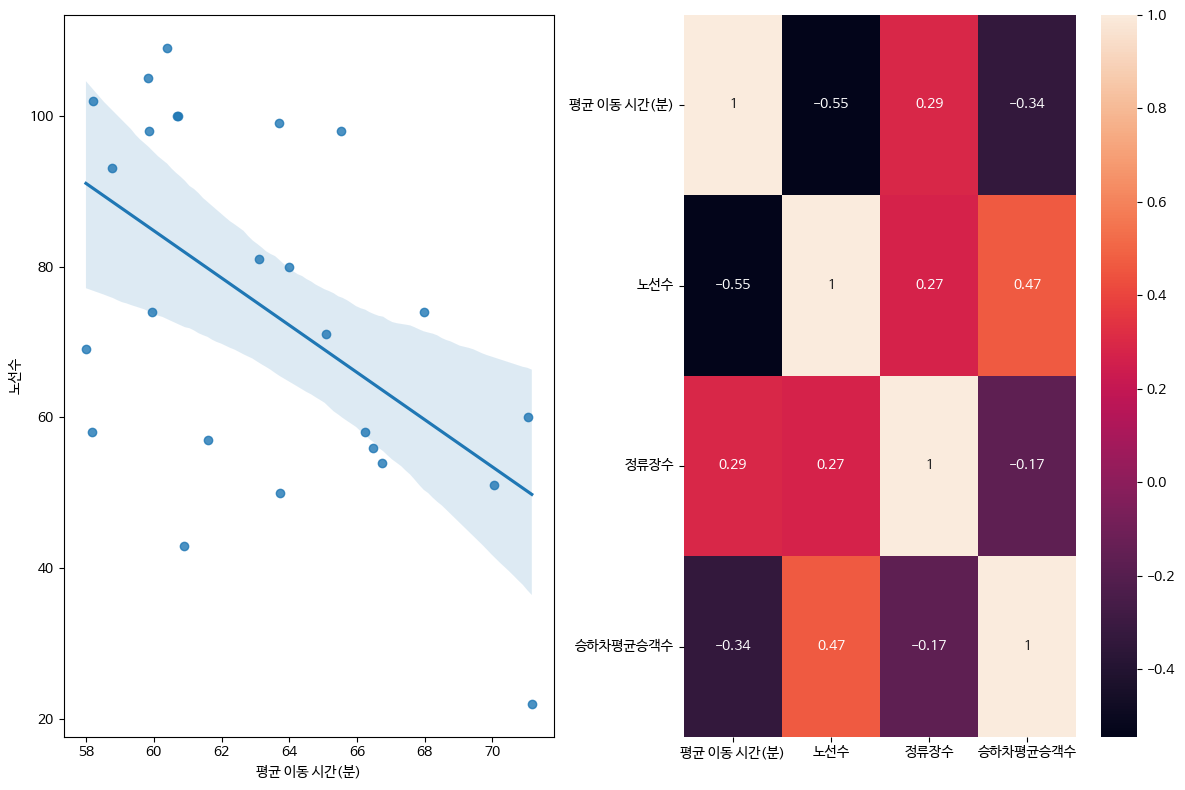

In [16]:
plt.figure(figsize = (12, 8))

# 평균 이동 시간 (분) 과 노선수 와의 상관관계 시각화
plt.subplot(1, 2, 1)
sns.regplot(x='평균 이동 시간(분)', y='노선수', data = df)

df['승하차평균승객수'] = (df['승차평균승객수'] + df['하차평균승객수']) / 2

# 평균 이동 시간(분), 노선수, 정류장수, 승하차평균승객수 컬럼들 간의 상관관계 히트맵
plt.subplot(1, 2, 2)
sns.heatmap(df[['평균 이동 시간(분)', '노선수','정류장수','승하차평균승객수']].corr(), annot = True)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [17]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

total_cor_1 = spst.pearsonr(df['평균 이동 시간(분)'], df['노선수'])
total_cor_2 = spst.pearsonr(df['승하차평균승객수'], df['노선수'])

print(f"평균 이동 시간(분)과 노선수의 상관계수 {np.round(total_cor_1[0], 2)}, p-value {total_cor_1[1]}로 0.05 이하")
print(f"승하차평균승객수과 노선수의 상관계수 {np.round(total_cor_2[0], 2)}, p-value {total_cor_2[1]}로 0.05 이하")

# 평균 이동 시간(분) 과 노선수는 상관성이 있다.
# 승하차평균승객수 와 노선수는 상관성이 있다.

평균 이동 시간(분)과 노선수의 상관계수 -0.55, p-value 0.004828245942394804로 0.05 이하
승하차평균승객수과 노선수의 상관계수 0.47, p-value 0.018162876113515962로 0.05 이하


### **가설 3** : 상가가 많이 발달하고, 승하차 평균 승객이 많지만 정류장이 많지 않은 곳에 정류장이 필요할 것이다

#### 가설 3 - 1 : **상가**와 **승하차 승객 수**는 총 유동인구와 높은 상관관계가 있을 것이다.

In [18]:
hyp_3_1 = pd.read_csv(path + '1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)
hyp_3_2 = df[['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '총 이동인구']].copy()

In [19]:
hyp_3_1 = hyp_3_1.drop(columns = list(hyp_3_1.columns[2::2]))
hyp_3_1 = hyp_3_1.loc[hyp_3_1['동'] == '소계'].copy()
hyp_3_1.pop('동')
hyp_3_1.replace(',', '', inplace = True, regex = True)
hyp_3_1[hyp_3_1.columns[1:]] = hyp_3_1[hyp_3_1.columns[1:]].astype('int64')


hyp_3_2['승하차총합'] = hyp_3_2['승차총승객수'] + hyp_3_2['하차총승객수']
hyp_3_2['승하차평균총합'] = hyp_3_2['승차평균승객수'] + hyp_3_2['하차평균승객수']

hyp_3 = pd.merge(hyp_3_1, hyp_3_2)

In [20]:
hyp_3_selected_cols = hyp_3[list(hyp_3.columns[:11]) + list(hyp_3.columns[-3:])]

In [21]:
hyp_3_selected_cols.head(3)

,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,총 이동인구,승하차총합,승하차평균총합
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982,19803049.50,8849230,242.418091
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121,21132891.17,6188757,224.230326
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184,14930983.13,6918152,237.410844


<ipython-input-22-50dbf0632a36>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hyp_3_selected_cols.corr()


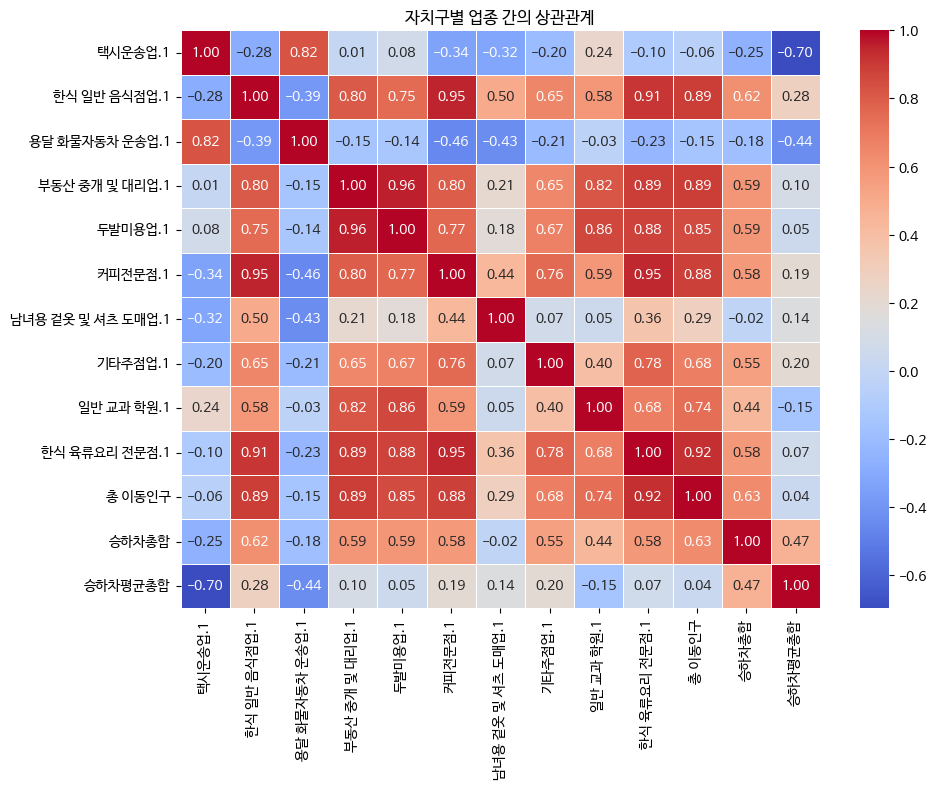

In [22]:
# 자치구별 업종 간의 상관관계
# 목표 : 총 이동인구 와 업종 종사자 수와 관계를 살펴보며, 발달된 상가들이 포함한 사업체 종목들을 구별하기 위함

correlation_matrix = hyp_3_selected_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('자치구별 업종 간의 상관관계')
plt.tight_layout()
plt.show()

In [23]:
# 총 이동인구 와 사업체 종목들 간의 상관관계를 비교후 연관이 없는 컬럼을 제외
hyp_3_df = hyp_3.drop(columns = ['택시운송업.1', '용달 화물자동차 운송업.1', '남녀용 겉옷 및 셔츠 도매업.1'])
hyp_3_df.head(3)

,자치구,한식 일반 음식점업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동인구,승하차총합,승하차평균총합
0,종로구,5912,889,480,3613,1413,382,1982,356,105,4500874,4348356,123.298104,119.119987,19803049.50,8849230,242.418091
1,중구,6414,1152,816,3542,982,175,2121,173,102,3138112,3050645,113.699710,110.530616,21132891.17,6188757,224.230326
2,용산구,2987,1214,777,2076,1332,573,1184,326,69,3495720,3422432,119.962938,117.447907,14930983.13,6918152,237.410844


In [24]:
hyp_3.head()

,자치구,택시운송업.1,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,남녀용 겉옷 및 셔츠 도매업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동인구,승하차총합,승하차평균총합
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982,356,105,4500874,4348356,123.298104,119.119987,19803049.50,8849230,242.418091
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121,173,102,3138112,3050645,113.699710,110.530616,21132891.17,6188757,224.230326
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184,326,69,3495720,3422432,119.962938,117.447907,14930983.13,6918152,237.410844
3,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545,432,58,2371151,2331836,90.495039,88.994581,17378528.65,4702987,179.489619
4,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678,274,43,2365355,2382437,107.491706,108.267985,17668243.56,4747792,215.759691


In [25]:
# 상가총합 : 발달된 상가 사업체 종목들간의 합
hyp_3_df['상가총합'] = hyp_3_df[hyp_3_df.columns[1:8]].sum(axis=1)

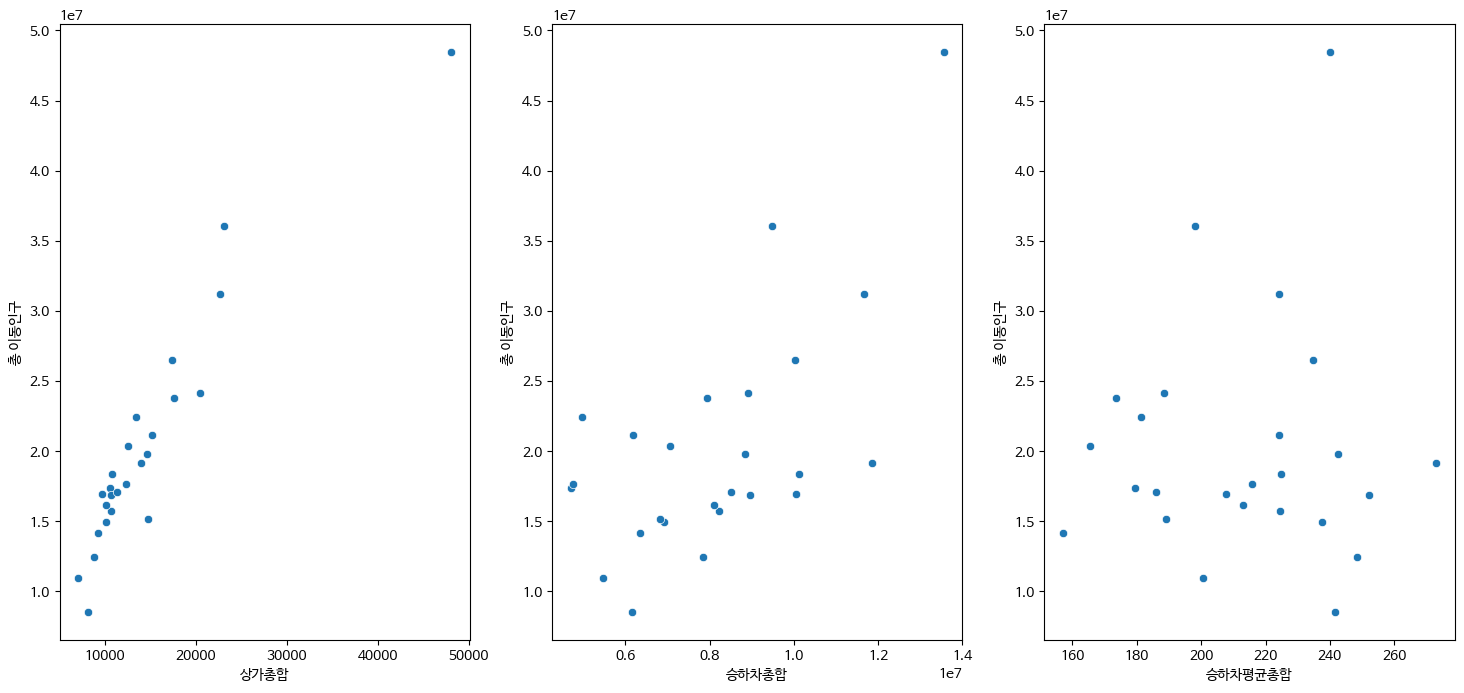

In [26]:
# 총 이동인구와 상가총합 간의 상관관계 시각화
plt.figure(figsize = (18, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(x = '상가총합', y = '총 이동인구', data = hyp_3_df)

# 총 이동인구와 승하차총합 간의 상관관계 시각화
plt.subplot(1, 3, 2)
sns.scatterplot(x = '승하차총합', y = '총 이동인구', data = hyp_3_df)

# 총 이동인구와 승하차평균총합 간의 상관관계 시각화
plt.subplot(1, 3, 3)
sns.scatterplot(x = '승하차평균총합', y = '총 이동인구', data = hyp_3_df)
plt.show()

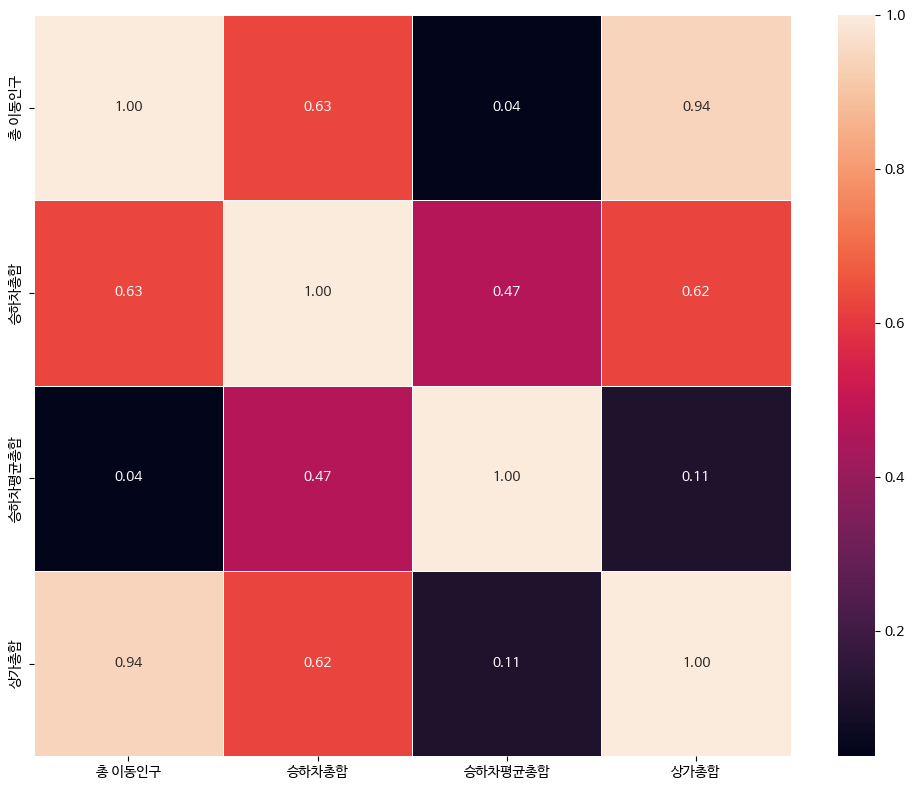

In [27]:
# [총 이동인구, 상가총합, 승하차총합, 승하차평균총합] 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(hyp_3_df.iloc[:, -4:].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()

In [28]:
import scipy.stats as spst


cor_1 = spst.pearsonr(hyp_3_df['상가총합'], hyp_3_df['총 이동인구'])
cor_2 = spst.pearsonr(hyp_3_df['승하차총합'], hyp_3_df['총 이동인구'])
cor_3 = spst.pearsonr(hyp_3_df['승하차평균총합'], hyp_3_df['총 이동인구'])

print(f"상가 총합과 유동인구의 상관계수 {np.round(cor_1[0], 2)}, p-value {cor_1[1]}로 0.05 이하")
print(f"승하차총합과 유동인구의 상관계수 {np.round(cor_2[0], 2)}, p-value {cor_2[1]}로 0.05 이하")
print(f"승하차평균총합과 유동인구의 상관계수 {np.round(cor_3[0], 2)}, p-value {cor_3[1]}로 0.05 이상")

# 상가 개수(상가총합), 승하차승객수총합, 승하차평균총합 순으로 유동인구와 높은 상관관계가 있다.
# 상가 개수(상가총합)와 승하차승객수총합은 관계가 있으나, 평균 승객은 유의미한 관계를 보이고 있지않다.

상가 총합과 유동인구의 상관계수 0.94, p-value 2.387695248905012e-12로 0.05 이하
승하차총합과 유동인구의 상관계수 0.63, p-value 0.0007167474589489073로 0.05 이하
승하차평균총합과 유동인구의 상관계수 0.04, p-value 0.8569474258867641로 0.05 이상


#### 가설 3 - 2 : **총 유동인구**와 **버스 수요(즉, 정류장 수)**는 높은 상관관계가 있을 것이다.

In [29]:
hyp_2 = pd.merge(pd.merge(standard,df_seoul_bus_station), df_seoul_moving)

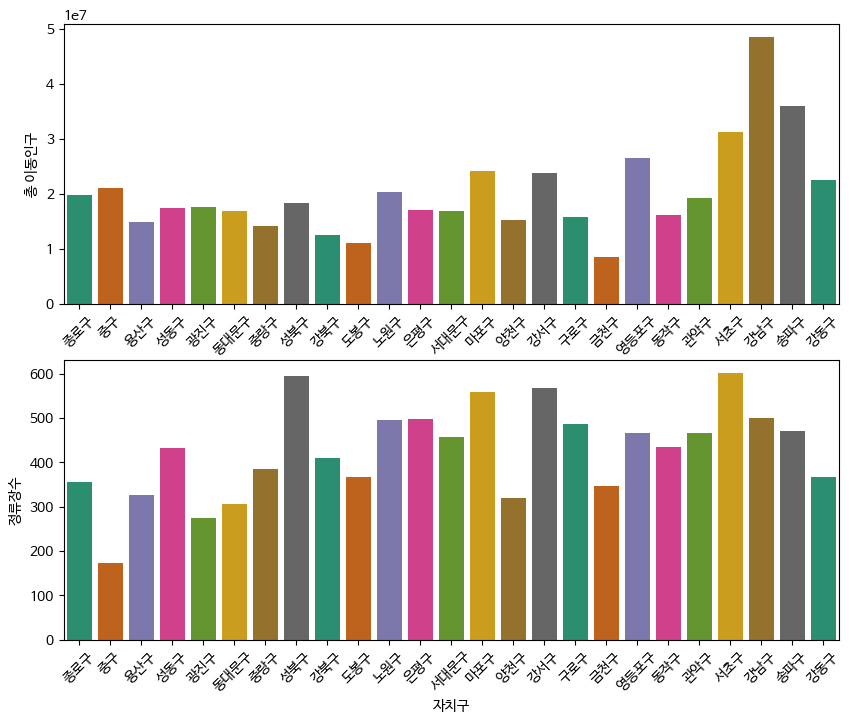

In [30]:
# 자료 비교
plt.figure(figsize = (10, 8))

# 자치구별 총 이동인구 시각화
plt.subplot(2, 1, 1)
sns.barplot(x='자치구', y='총 이동인구', data = hyp_2, palette = 'Dark2', hue = '자치구', legend = False)
plt.xticks(rotation = 45)

# 자치구별 총 정류장수 시각화
plt.subplot(2, 1, 2)
sns.barplot(x='자치구', y='정류장수', data = hyp_2, palette = 'Dark2', hue = '자치구', legend = False)
plt.xticks(rotation = 45)

plt.show()

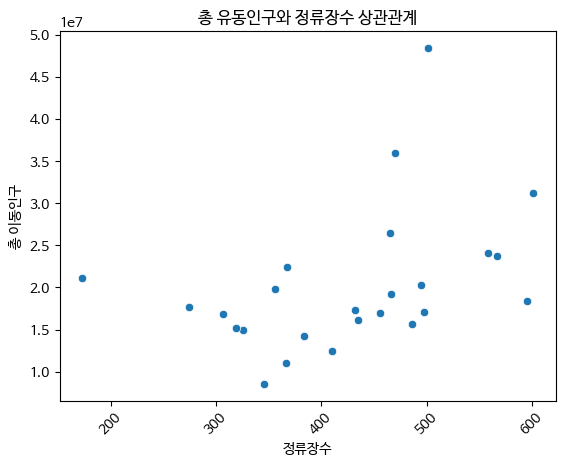

****************************************************************************************************
상가 총합과 유동인구의 상관계수 0.4, p-value 0.050198531398316655


In [31]:
# 총 유동인구와 정류장수 상관관계
sns.scatterplot(x='정류장수', y='총 이동인구', data = hyp_2)
plt.xticks(rotation = 45)
plt.title('총 유동인구와 정류장수 상관관계')
plt.show()

cor_4 = spst.pearsonr(hyp_2['정류장수'], hyp_2['총 이동인구'])

print('*' * 100)
print(f"상가 총합과 유동인구의 상관계수 {np.round(cor_4[0], 2)}, p-value {cor_4[1]}")

# 총 유동인구와 정류장 수의 상관계수는 0.40, p-value는 0.05와 근사한 값으로 서로 관계가 있다고 볼 수 있다.

### 가설 3. 결론 : 상가와 승하차 승객 수는 정류장 수요에 유의미하므로, 상가와 승하차 승객 수 대비 정류장 비율이 가장 낮은 곳에 정류장을 더 설치하면 될 것이다.

In [32]:
hyp_3 = hyp_3_df.sort_values(by = ['상가총합', '승하차총합', '승하차평균총합'], ascending=False)
hyp_3 = hyp_3.sort_values(by=['정류장수'], ascending=True)
hyp_3['상가 대비 정류장 수'] = hyp_3['정류장수'] / hyp_3['상가총합']
hyp_3['승하차 대비 정류장 수'] = hyp_3['정류장수'] / hyp_3['승하차총합']
hyp_3.set_index('자치구', drop = True, inplace = True)
hyp_3.head(3)

,한식 일반 음식점업.1,부동산 중개 및 대리업.1,두발미용업.1,커피전문점.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동인구,승하차총합,승하차평균총합,상가총합,상가 대비 정류장 수,승하차 대비 정류장 수
자치구,,,,,,,,,,,,,,,,,,,
중구,6414,1152,816,3542,982,175,2121,173,102,3138112,3050645,113.699710,110.530616,21132891.17,6188757,224.230326,15202,0.011380,0.000028
광진구,2861,1313,1337,1887,1577,1646,1678,274,43,2365355,2382437,107.491706,108.267985,17668243.56,4747792,215.759691,12299,0.022278,0.000058
동대문구,3566,1208,891,1472,1082,984,1509,307,74,4530373,4426822,127.573018,124.657074,16866011.11,8957195,252.230091,10712,0.028659,0.000034


In [33]:
station_ratio_by_business = hyp_3['상가 대비 정류장 수']
station_ratio_by_business = station_ratio_by_business.sort_values(ascending=True)

station_ratio_by_passengers = hyp_3['승하차 대비 정류장 수']
station_ratio_by_passengers = station_ratio_by_passengers.sort_values(ascending=True)


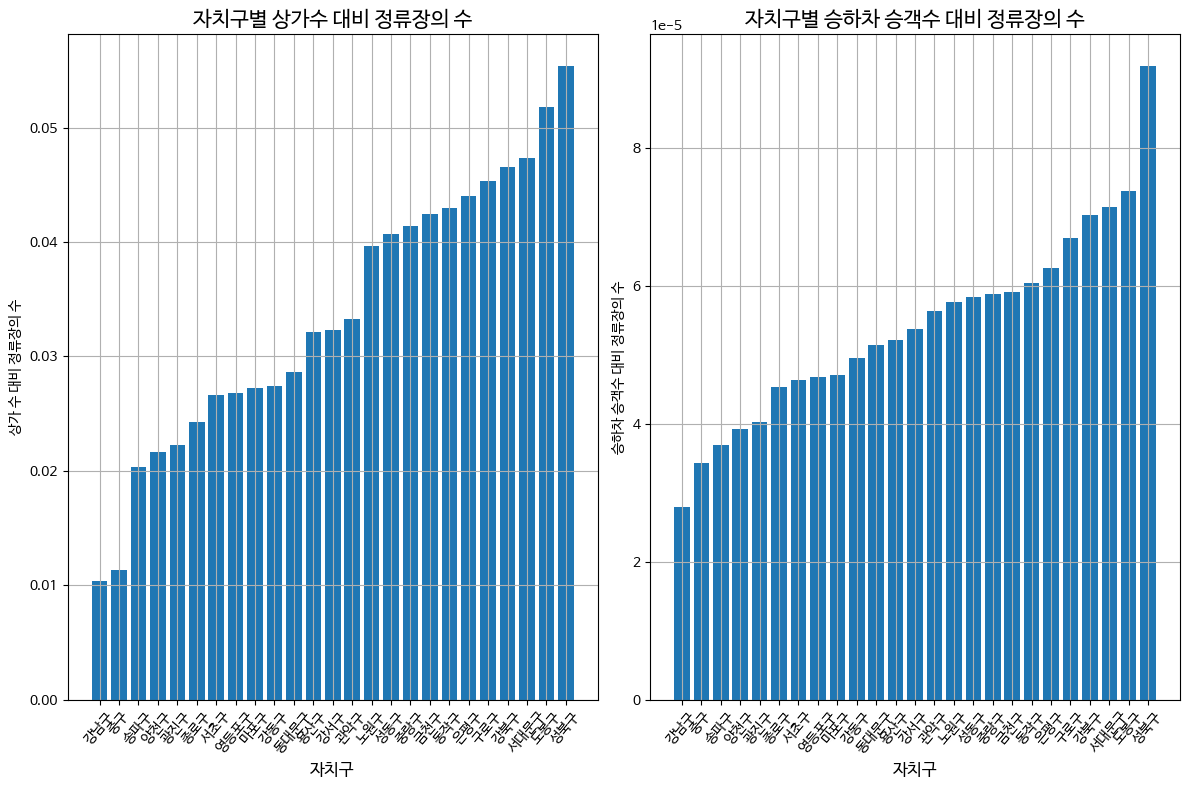

In [34]:
label = station_ratio_by_business.index
index = np.arange(len(label))

# 시각화
plt.figure(figsize = (12, 8))

# 자치구별 상가수 대비 정류장의 수
plt.subplot(1, 2, 1)
plt.bar(index, station_ratio_by_business)
plt.title('자치구별 상가수 대비 정류장의 수', fontsize=15)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('상가 수 대비 정류장의 수', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=50)
plt.grid()

# 자치구별 승하차 승객수 대비 정류장의 수
plt.subplot(1, 2, 2)
plt.bar(index, station_ratio_by_passengers)
plt.title('자치구별 승하차 승객수 대비 정류장의 수', fontsize=15)
plt.xlabel('자치구', fontsize=12)
plt.ylabel('승하차 승객수 대비 정류장의 수', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=50)
plt.grid()

plt.tight_layout()
plt.show()

> 결론 : 왼쪽으로 갈 수록 상가 & 승하차 승객의 수는 많지만, 정류장의 수는 적은 것을 의미하므로
두 그래프에서 모두 하위에 랭크된 중구, 강남구, 종로구 3개의 자치구에 가장 필요할 것으로 보인다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

### 1) 정류장수


In [35]:
df['정류장수'].describe()

count     25.000000
mean     426.080000
std      105.022982
min      173.000000
25%      356.000000
50%      435.000000
75%      495.000000
max      601.000000
Name: 정류장수, dtype: float64

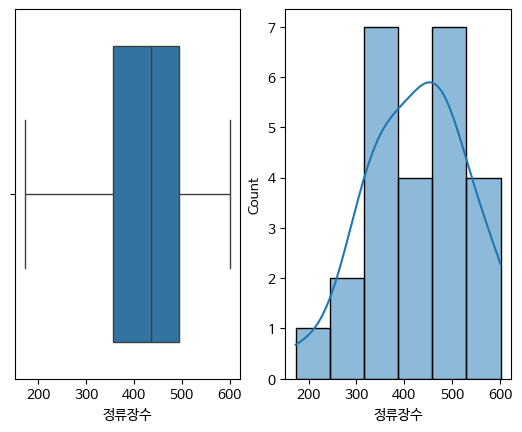

In [36]:
plt.subplot(1, 2, 1)
sns.boxplot(x = '정류장수', data = df)

plt.subplot(1, 2, 2)
sns.histplot(x= '정류장수', data = df, kde = True)
plt.show()

### 2) 노선수

In [37]:
df['노선수'].describe()

count     25.000000
mean      74.480000
std       23.331167
min       22.000000
25%       57.000000
50%       74.000000
75%       98.000000
max      109.000000
Name: 노선수, dtype: float64

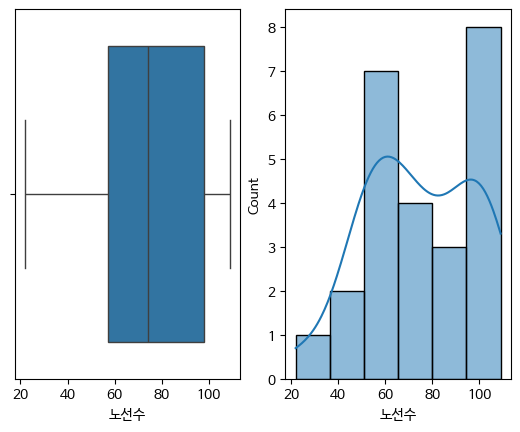

In [38]:
plt.subplot(1, 2, 1)
sns.boxplot(x = '노선수', data = df)

plt.subplot(1, 2, 2)
sns.histplot(x= '노선수', data = df, kde = True)
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


<ipython-input-39-0b2bb32202ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.sort_values(by='정류장수', ascending=False), x='자치구', y='정류장수', palette="viridis")


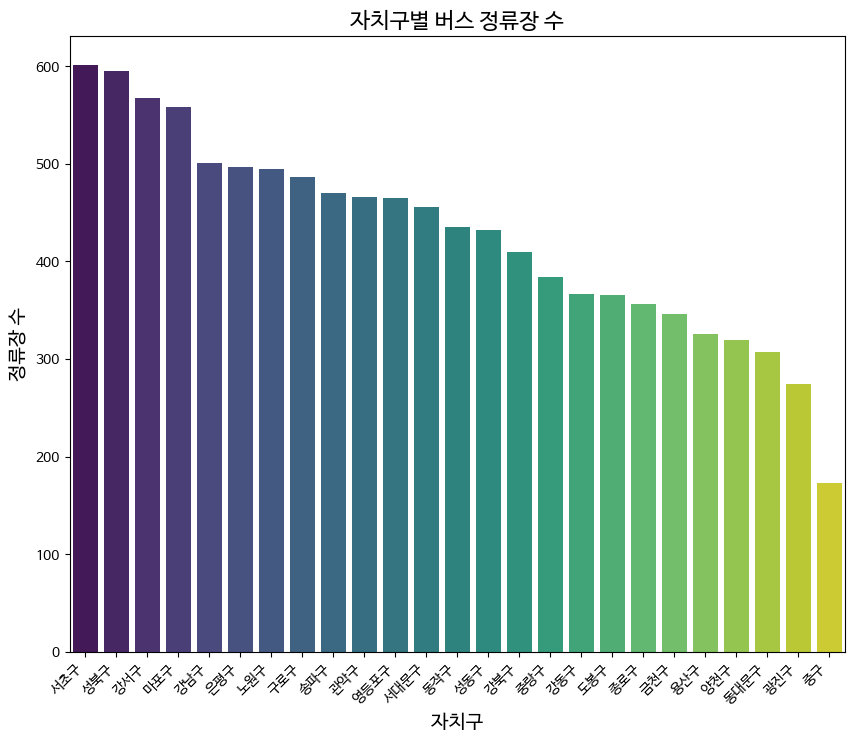

In [39]:
# 이변량 분석 시각화: 자치구별 버스 정류장 수
plt.figure(figsize=(10, 8))
sns.barplot(data = df.sort_values(by='정류장수', ascending=False), x='자치구', y='정류장수', palette="viridis")
plt.title('자치구별 버스 정류장 수', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('정류장 수', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<ipython-input-40-27d206c0a6f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values(by='승차총승객수', ascending=False), x='자치구', y='승차총승객수', palette="flare")


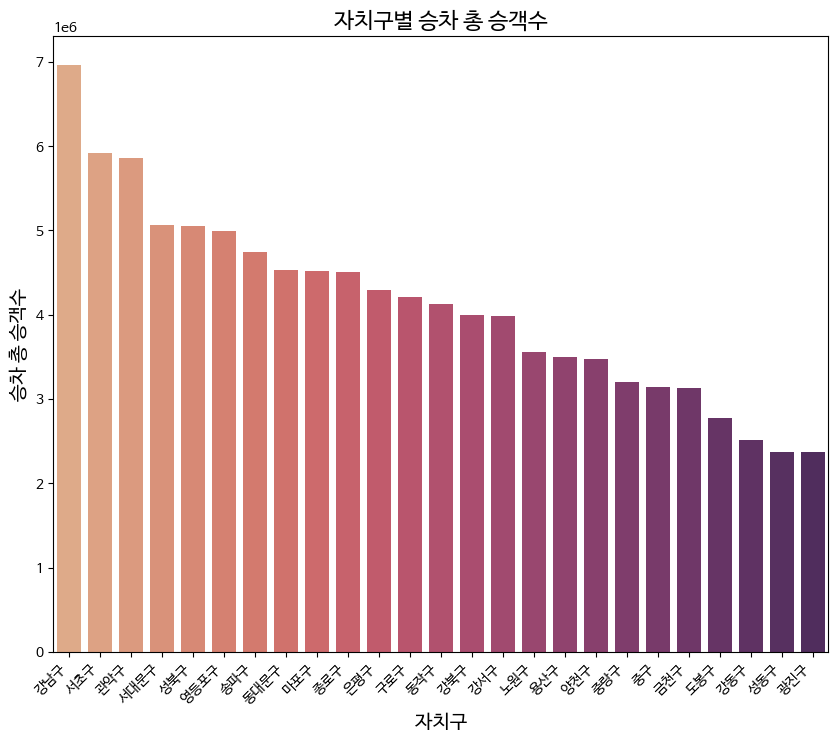

In [40]:
# 이변량 분석 시각화: 자치구별 승차 총 승객수
plt.figure(figsize=(10, 8))
sns.barplot(data=df.sort_values(by='승차총승객수', ascending=False), x='자치구', y='승차총승객수', palette="flare")
plt.title('자치구별 승차 총 승객수', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('승차 총 승객수', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<ipython-input-41-cb7a324afc96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values(by='합계', ascending=False), x='자치구', y='합계', palette="coolwarm")


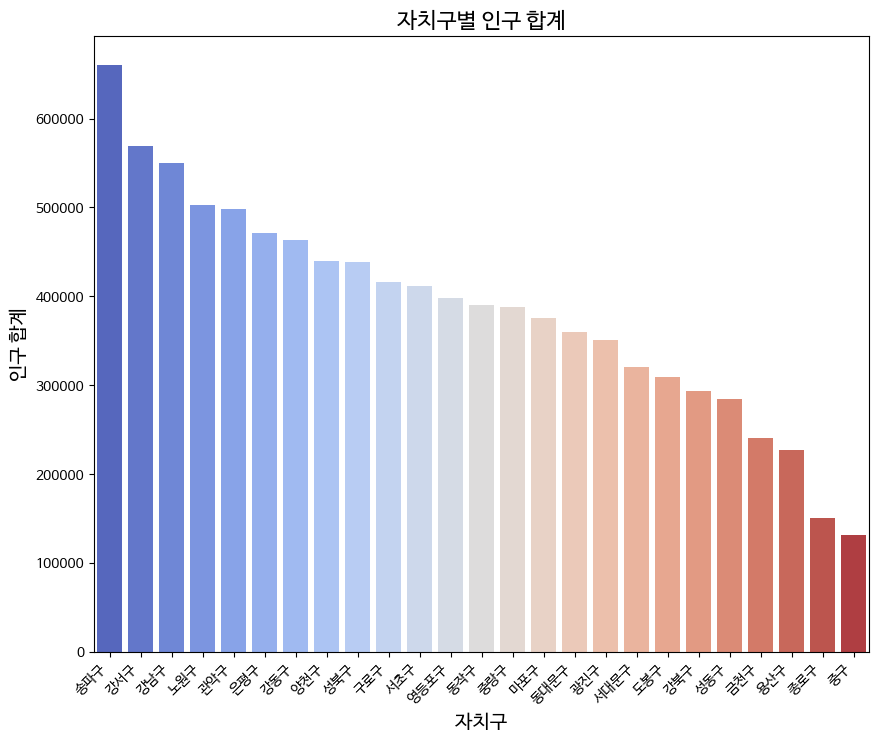

In [41]:
# 이변량 분석 시각화: 자치구별 인구 분포
plt.figure(figsize=(10, 8))
sns.barplot(data=df.sort_values(by='합계', ascending=False), x='자치구', y='합계', palette="coolwarm")
plt.title('자치구별 인구 합계', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('인구 합계', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

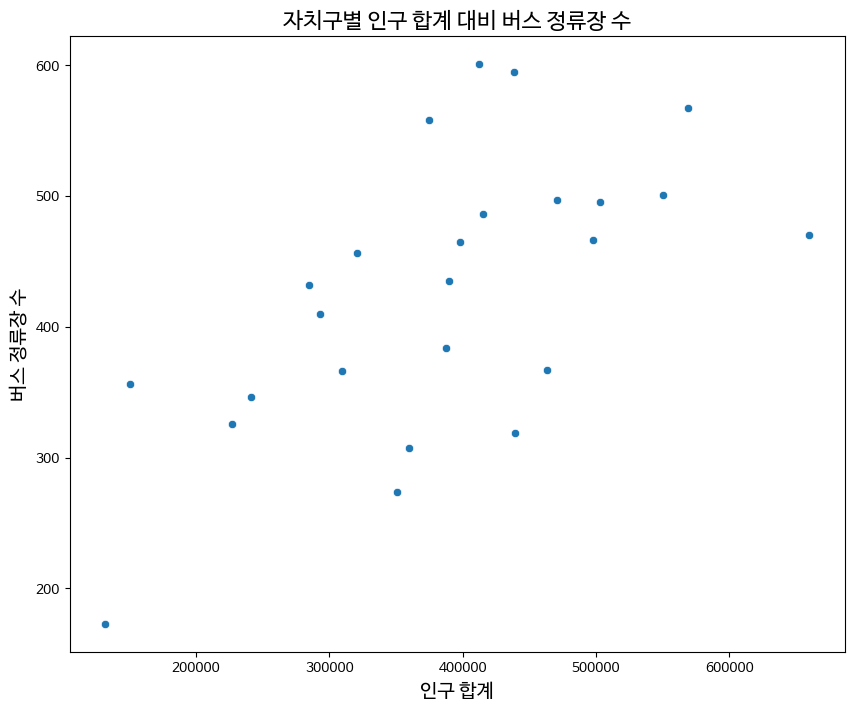

In [42]:
# 이변량 분석 시각화: 자치구별 인구 합계 대비 버스 정류장 수
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='합계', y='정류장수')
plt.title('자치구별 인구 합계 대비 버스 정류장 수', fontsize=16)
plt.xlabel('인구 합계', fontsize=14)
plt.ylabel('버스 정류장 수', fontsize=14)
plt.show()

<ipython-input-43-74a49ab664c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='합계', data=df, palette="coolwarm")


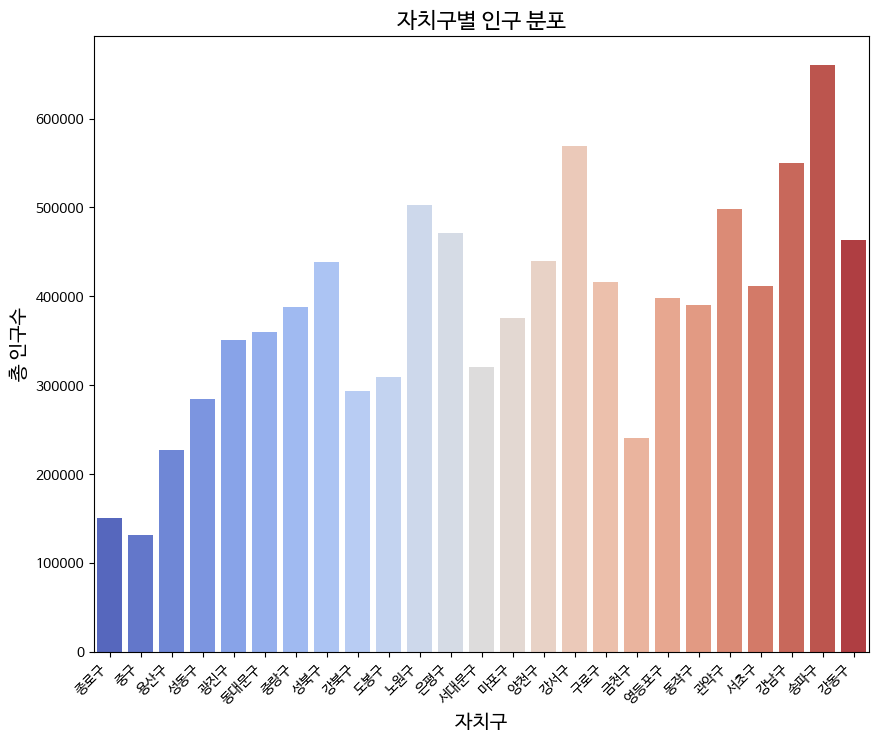

In [43]:
# Insight 1: 자치구별 인구 분포
plt.figure(figsize=(10, 8))
sns.barplot(x='자치구', y='합계', data=df, palette="coolwarm")
plt.title('자치구별 인구 분포', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('총 인구수', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<Figure size 1000x800 with 0 Axes>

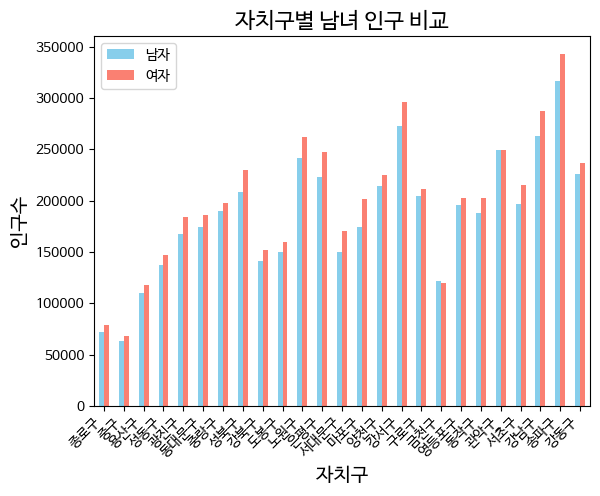

In [44]:
# Insight 2: 자치구별 남녀 인구 비교
plt.figure(figsize=(10, 8))
df.set_index('자치구')[['남자', '여자']].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('자치구별 남녀 인구 비교', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('인구수', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


<ipython-input-45-825d2775d954>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='자치구', y='합계', data=top_districts_population, palette="viridis")


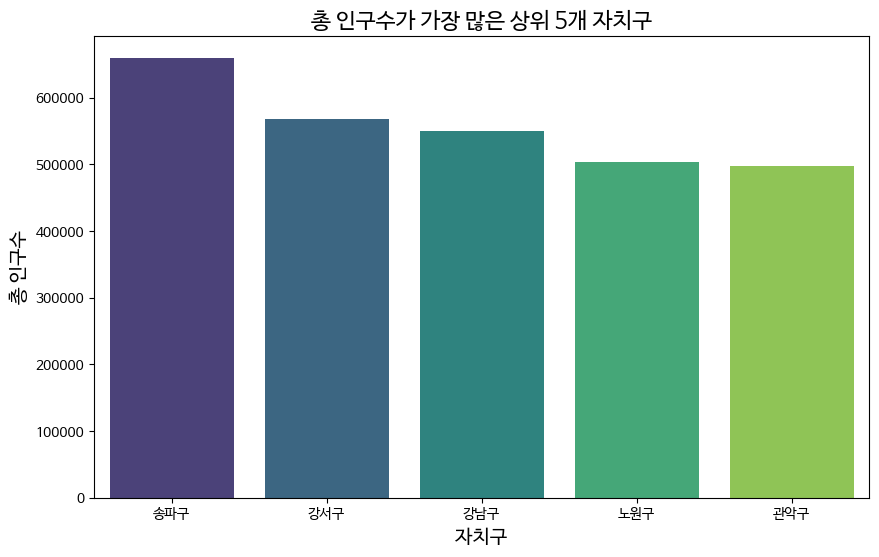

In [45]:
# Insight 3: 총 인구수가 가장 많은 상위 5개 자치구
top_districts_population = df.sort_values(by='합계', ascending=False).head()
plt.figure(figsize=(10, 6))
sns.barplot(x='자치구', y='합계', data=top_districts_population, palette="viridis")
plt.title('총 인구수가 가장 많은 상위 5개 자치구', fontsize=16)
plt.xlabel('자치구', fontsize=14)
plt.ylabel('총 인구수', fontsize=14)
plt.show()

Text(0, 0.5, '하차총승객수')

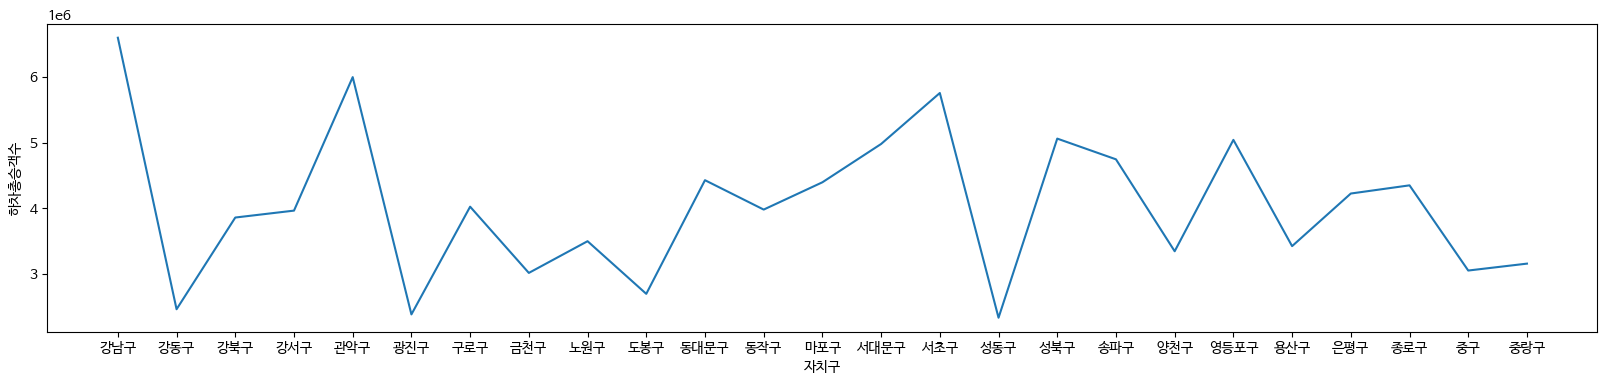

In [46]:
# 자치구별 하차총 승객수 시각화
plt.figure(figsize=(20,4))
plt.plot('자치구','하차총승객수',data = df_seoul_bus_station)
plt.xlabel('자치구')
plt.ylabel('하차총승객수')

## 4.관계 정리

### 1) 강한 관계의 변수

> * 평균 이동 시간(분) - 노선수 : -0.55    
* 승하차평균승객수 - 노선수 : 0.47
* 한식 일반 음식점업.1 - 유동인구 : 0.89
* 부동산 중개 및 대리업.1 - 유동인구 : 0.89
* 두발 미용업.1 - 유동인구 : 0.85
* 커피전문점.1 - 유동인구 : 0.88
* 기타 주점업.1 - 유동인구 : 0.68
* 일반 교과 학원.1 - 유동인구 : 0.74
* 한식 육류요리 전문점.1 - 유동인구 : 0.92
* 상가 총합 - 유동인구 : 0.94
* 승하차총합 - 유동인구 : 0.63
* 유동인구 - 정류장수 : 0.4


### 2) 약한 관계의 변수

> * 승하차평균총합 - 유동인구 : 0.04

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

# 결론 : 중구, 강남구, 종로구 3개의 자치구에 버스 정류장이 가장 필요할 것으로 보인다.